In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("SAheart.csv")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [2]:
print(f"Frecuencia de la variable {df.chd.value_counts()}")

Frecuencia de la variable chd
No    302
Si    160
Name: count, dtype: int64


In [ ]:
df["chd"] = df["chd"].map({"Si": 1, "No": 0})

In [5]:
df["famhist"] = df["famhist"].map({"Present": 1, "Absent": 0})

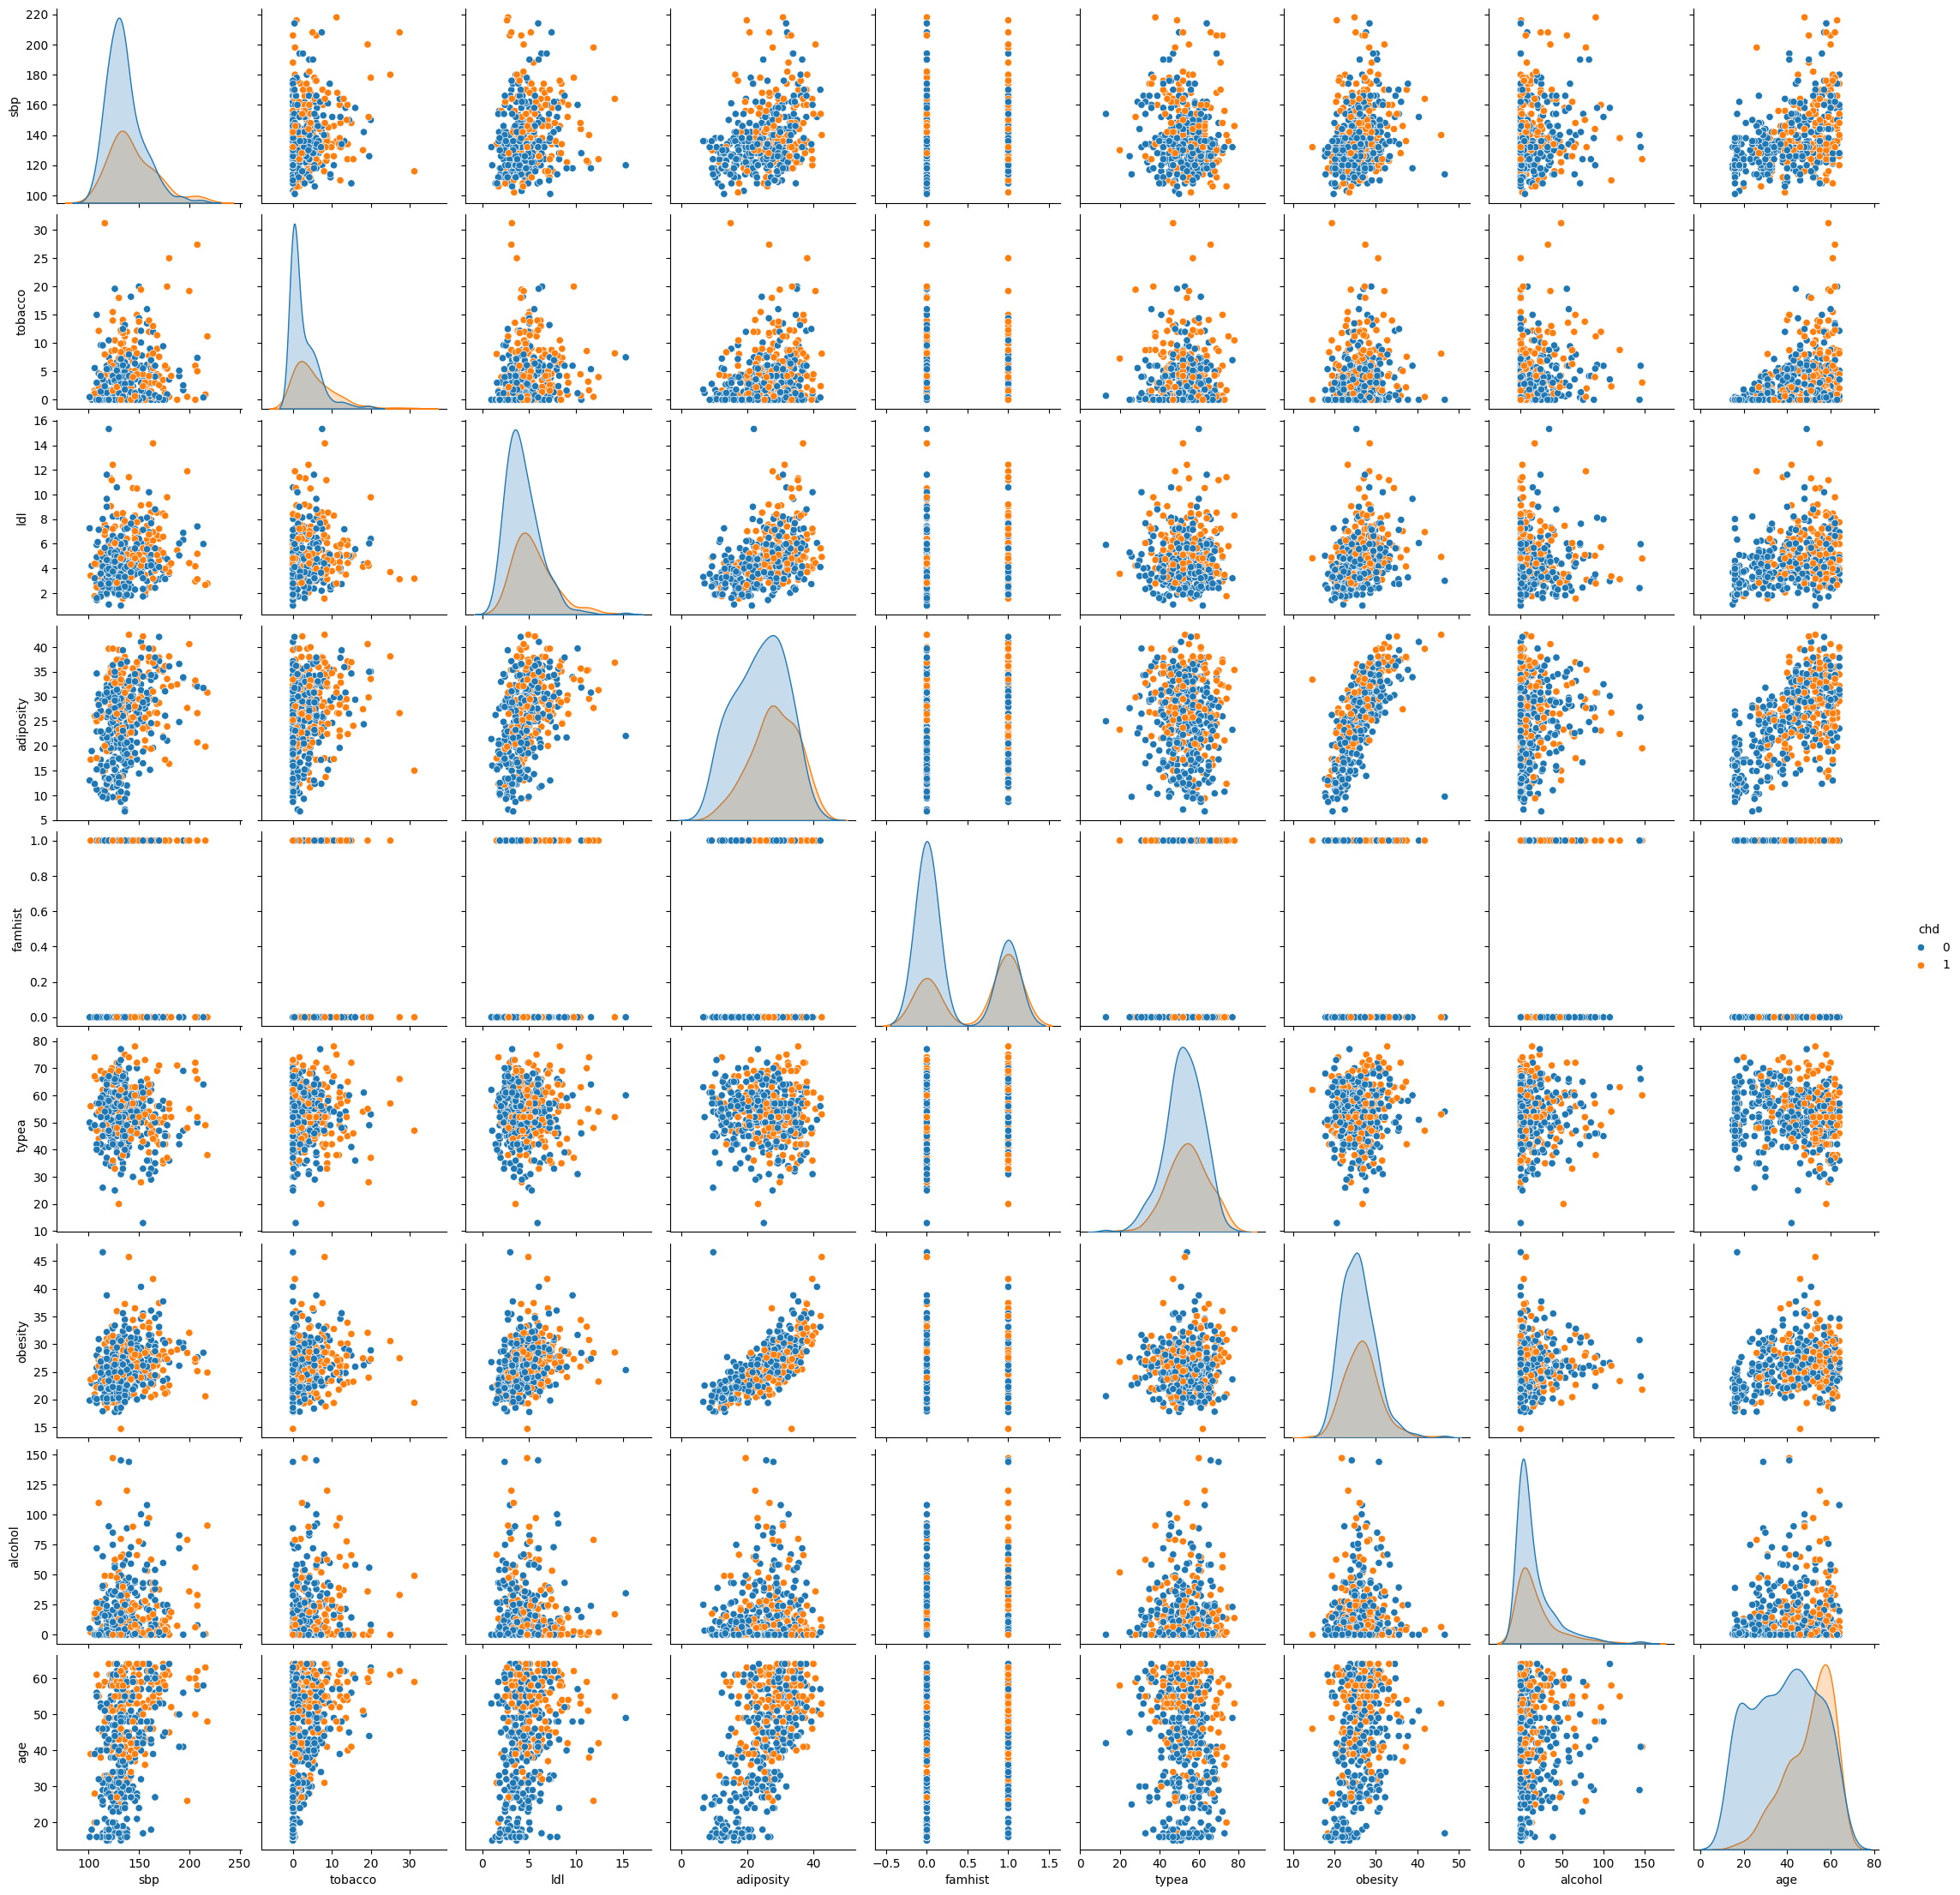

In [6]:
import seaborn as sns
sns.pairplot(df, hue="chd")

## MLP en sklearn

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier

In [10]:
seed = 100620

In [8]:
X = df[["age", "tobacco", "obesity"]]
y = df["chd"]

In [13]:
# 1. Defino estructurea de validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.2)

# 2. transformacions obligatorias de la red
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 3 Elijo modelo
model = MLPClassifier(random_state=seed)    # Elijo arquitectura fijando hiperparametros

# 4 Entreno modelo
model.fit(X_train_sc, y_train)   # Aqui se calculan las w y b

# 5 Obtengo predicciones
y_pred = model.predict(X_test_sc)

# 6 Evaluo
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6881720430107527


In [12]:
# 5 Obtengo predicciones para train para comparar
y_pred_tr = model.predict(X_train_sc)

# 6 Evaluo el train para comparar
accuracy = accuracy_score(y_train, y_pred_tr)
print(accuracy)


0.7181571815718157


In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = df[["famhist"]]
y = df["chd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.2)
scaler = OneHotEncoder(drop="first")
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
